In [2]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist

In [20]:
def normalize_histogram(hist):
    return hist / hist.sum()

def compute_cumulative_histogram(hist):
    return np.cumsum(hist)

def earth_mover_distance(hist1, hist2):
    cdf1 = compute_cumulative_histogram(hist1)
    cdf2 = compute_cumulative_histogram(hist2)
    #print cdf1 and cdf2 to a file:
    np.savetxt('out/cdf1.txt', cdf1, fmt='%1.4e')
    np.savetxt('out/cdf2.txt', cdf2, fmt='%1.4e')
    return np.sum(np.abs(cdf1 - cdf2))

def compare_images(image_path1, image_path2, num_bins=256):
    # Leer las imágenes
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Convertir las imágenes a espacio de color HSV
    hsv1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

    # Calcular los histogramas
    hist1 = cv2.calcHist([hsv1], [0], None, [num_bins], [0, num_bins])
    hist2 = cv2.calcHist([hsv2], [0], None, [num_bins], [0, num_bins])

    # Normalizar los histogramas
    hist1 = normalize_histogram(hist1)
    hist2 = normalize_histogram(hist2)

    # Calcular la Earth Mover's Distance
    emd = earth_mover_distance(hist1, hist2)

    return emd, hist1, hist2




In [21]:
# Ejemplo de uso
image1 = 'imgs_ejemplo/q1520.jpg'
image2 = 'imgs_ejemplo/r1210.jpg'
emd, hist1, hist2 = compare_images(image1, image2)
print(f'Earth Mover\'s Distance entre las imágenes: {emd}')

Earth Mover's Distance entre las imágenes: 1.8113656044006348


(256, 1) (256, 1)


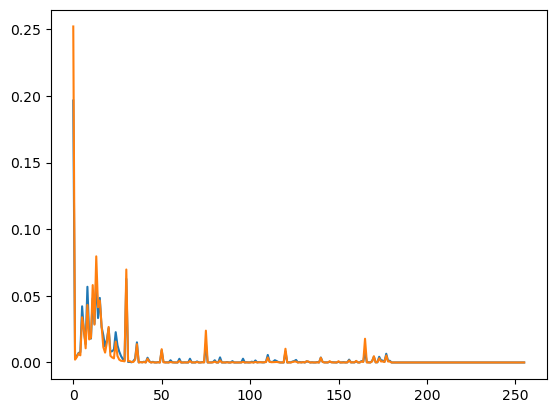

In [25]:
print(hist1.shape, hist2.shape)

#plot the histograms
import matplotlib.pyplot as plt
plt.plot(hist1)
plt.plot(hist2)
plt.show()



